<a href="https://colab.research.google.com/github/minjeong-kim-git/NLP/blob/main/Day1_EVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVN

In [86]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [87]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

In [88]:
id_to_label[2]

'긍정'

In [89]:
sentences

['나는 오늘 기분이 좋아', '나는 오늘 우울해']

In [90]:
labels

[[1, 1, 1, 2], [1, 1, 0]]

## Vocabulary

In [91]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
  words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [92]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [93]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]' : 0, '[UNK]' : 1} # PAD 길이를 조절할 때, UNK: vocab에 없는 단어
for word in words:
  word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [94]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [95]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
  train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [96]:
# train_label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [97]:
# 문장의 길이를 모두 동일하게 변경(최대 길이 4)
for row in train_inputs:
  row += [1] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 1]]

In [98]:
# train_inputs를 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 1]])

In [99]:
# train_label은 label을 그대로 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [100]:
# 정답 길이를 모두 동일하게 변경(최대 길이 4)
for row in train_labels:
  row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [101]:
# 정답 길이를 모두 동일하게 함(최대 길이 4)
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [102]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8) # n_vocab, d_model
hidden = embedding(train_inputs)
train_inputs.shape, hidden

((2, 4), <tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
 array([[[ 0.01537312, -0.03966032, -0.04924404,  0.0329937 ,
           0.02209686, -0.04927124,  0.01118619,  0.01884795],
         [ 0.02093344,  0.03014841,  0.00724136,  0.04439532,
           0.02897117, -0.01297343,  0.04346753, -0.03540294],
         [-0.00116469, -0.0473483 , -0.04650457,  0.02961505,
           0.02385748, -0.03642883,  0.02428738, -0.02280418],
         [ 0.00981569, -0.00743397,  0.00424891, -0.03688117,
          -0.00763829, -0.02912178, -0.01691883, -0.02790977]],
 
        [[ 0.01537312, -0.03966032, -0.04924404,  0.0329937 ,
           0.02209686, -0.04927124,  0.01118619,  0.01884795],
         [ 0.02093344,  0.03014841,  0.00724136,  0.04439532,
           0.02897117, -0.01297343,  0.04346753, -0.03540294],
         [-0.029246  , -0.03181213,  0.02135661, -0.03150167,
          -0.02941985, -0.01388973,  0.00366318,  0.03250444],
         [-0.03333565,  0.00956415, -0.03947039, -0.00899249,


In [103]:
# 단어의 vector을 이용해서 긍정(2), 중립(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.33867455, 0.32095298, 0.34037244],
        [0.33471704, 0.33434403, 0.33093894],
        [0.32985997, 0.3179654 , 0.35217473],
        [0.33385855, 0.3241887 , 0.34195274]],

       [[0.33867455, 0.32095298, 0.34037244],
        [0.33471704, 0.33434403, 0.33093894],
        [0.32528198, 0.3257659 , 0.34895208],
        [0.328332  , 0.32124028, 0.35042772]]], dtype=float32)>

In [104]:
# 단어의 vector을 이용해서 긍정(2), 중립(1), 부정(0) 확률값 예측
linear_2 = tf.keras.layers.Dense(3)
logits = linear_2(hidden)
logits

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[ 0.05622068, -0.00496059, -0.04215453],
        [ 0.00474434,  0.09326424,  0.03888639],
        [ 0.04929757,  0.0117735 , -0.01738397],
        [ 0.0161388 ,  0.01497035,  0.01797163]],

       [[ 0.05622068, -0.00496059, -0.04215453],
        [ 0.00474434,  0.09326424,  0.03888639],
        [-0.0426243 , -0.04650788, -0.01836164],
        [-0.01896859, -0.02137715,  0.00388522]]], dtype=float32)>

In [105]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
demoninator = np.sum(numerator, axis = 2, keepdims=True)
numerator, demoninator

(array([[[1.0578312 , 0.9950517 , 0.9587216 ],
         [1.0047556 , 1.0977517 , 1.0396523 ],
         [1.0505329 , 1.011843  , 0.98276633],
         [1.0162697 , 1.0150831 , 1.0181341 ]],
 
        [[1.0578312 , 0.9950517 , 0.9587216 ],
         [1.0047556 , 1.0977517 , 1.0396523 ],
         [0.9582713 , 0.95455706, 0.98180586],
         [0.9812102 , 0.9788497 , 1.0038928 ]]], dtype=float32),
 array([[[3.0116045],
         [3.1421597],
         [3.0451424],
         [3.0494869]],
 
        [[3.0116045],
         [3.1421597],
         [2.8946342],
         [2.9639525]]], dtype=float32))

In [106]:
# 두 결과값 비교
probs = numerator / demoninator
probs

array([[[0.3512517 , 0.33040583, 0.31834245],
        [0.31976593, 0.34936216, 0.3308719 ],
        [0.34498647, 0.332281  , 0.32273248],
        [0.33325925, 0.33287013, 0.33387062]],

       [[0.3512517 , 0.33040583, 0.31834245],
        [0.31976593, 0.34936216, 0.3308719 ],
        [0.33105093, 0.32976776, 0.3391813 ],
        [0.33104786, 0.3302515 , 0.33870068]]], dtype=float32)

In [107]:
# dense의 weight, bias
weight, bias = linear_2.get_weights()
weight, bias

(array([[ 0.11905289,  0.1749255 ,  0.41701752],
        [-0.04227418,  0.52931243,  0.16662788],
        [-0.57217634,  0.5654085 ,  0.3325656 ],
        [ 0.24083012,  0.41550404, -0.6398091 ],
        [ 0.5108654 ,  0.3677079 ,  0.44107884],
        [-0.36703908, -0.6038922 ,  0.26798457],
        [-0.7225838 ,  0.2027992 ,  0.6191953 ],
        [-0.24927494, -0.6722916 , -0.42122886]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [108]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[ 0.05622067, -0.00496059, -0.04215452],
        [ 0.00474434,  0.09326424,  0.03888639],
        [ 0.04929757,  0.01177351, -0.01738397],
        [ 0.0161388 ,  0.01497035,  0.01797162]],

       [[ 0.05622067, -0.00496059, -0.04215452],
        [ 0.00474434,  0.09326424,  0.03888639],
        [-0.0426243 , -0.04650788, -0.01836164],
        [-0.01896859, -0.02137715,  0.00388522]]], dtype=float32)

In [109]:
def build_model(n_vocab, d_model, n_seq, n_out):
  """
  동작만 하는 간단한 모델
  :param n_vocab: vocabulary 단어 수
  :param d_model: 단어를 의미하는 벡터의 차원 수
  :param n_seq: 문장 길이(단어 수)
  :param n_out: 예측할 class 개수
  """
  inputs = tf.keras.layers.Input((n_seq,)) #(bs, n_seq)
  # 입력 단어를 vector로 저장
  embedding = tf.keras.layers.Embedding(n_vocab, d_model)
  hidden = embedding(inputs)
  # 단어의 vector을 이용해서 정답 확률값 예측
  linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
  outputs = linear(hidden)
  
  # 학습할 모델 선언
  model = tf.keras.Model(inputs = inputs, outputs = outputs)
  return model

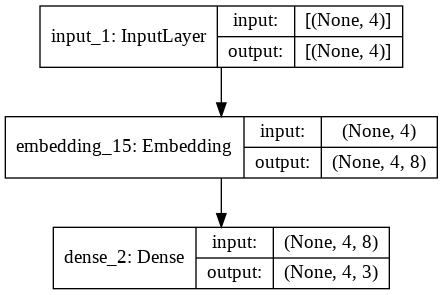

In [110]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

In [111]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 4, 8)              56        
_________________________________________________________________
dense_2 (Dense)              (None, 4, 3)              27        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## 학습

In [112]:
# 모델 loss, optimizer, metric 정의
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 648ms/step - loss: 1.1008 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0975 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0941 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0908 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0874 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0841 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0808 - accuracy: 0.3750
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0775 - accuracy: 0.3750
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0742 - accuracy: 0.3750
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0709 - accuracy: 0.3750
Epoch 11/100
1/1 [=========

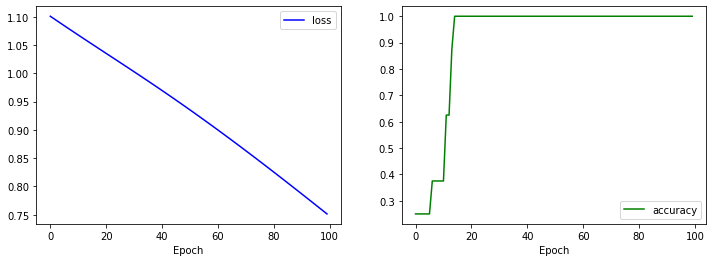

In [114]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [115]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 163ms/step - loss: 0.7474 - accuracy: 1.0000


[0.7473893165588379, 1.0]

## 예측

In [116]:
# 추론할 입력
string = "나는 기분이 우울해"

In [117]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [118]:
# 문장의 길이를 모두 동일하게 변경 (최대 길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [119]:
# numpy array로 변환(batch size 1 증가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [120]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.27505037, 0.48607463, 0.23887497],
        [0.27114972, 0.49419108, 0.23465918],
        [0.40342546, 0.31050208, 0.2860724 ],
        [0.30587843, 0.390838  , 0.30328357]]], dtype=float32)

In [121]:
# 확률의 max 값을 추론 값으로 설정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])